In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123) #makes the random numbers predictable and is used for reproducibility

In [4]:
data = pd.read_csv('./Breast Cancer Wisconsin (Diagnostic) Data Set/data.csv')

In [5]:
data = data.iloc[:,1:-1] #Removing the Id and the Unnamed columns

In [6]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
#encode the Categorical Variable

In [7]:
corr = data.corr() #Generating the correlation matrix

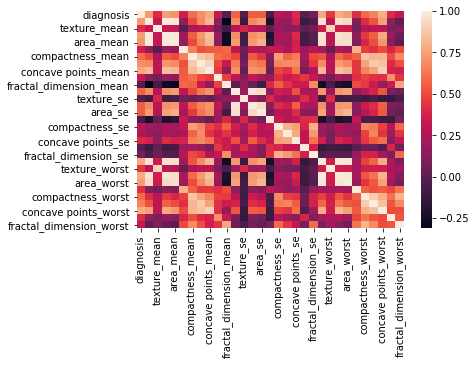

In [8]:
sns.heatmap(corr) #Generating the correlation heat-map

In [9]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
#compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [10]:
#selecting the columns based on how they affect the p-value. We are the removing the column diagnosis because it is the column we are trying to predict
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [11]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]
#move the result to a new Dataframe

In [12]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
#Creating a Dataframe with the columns selected using the p-value and correlation

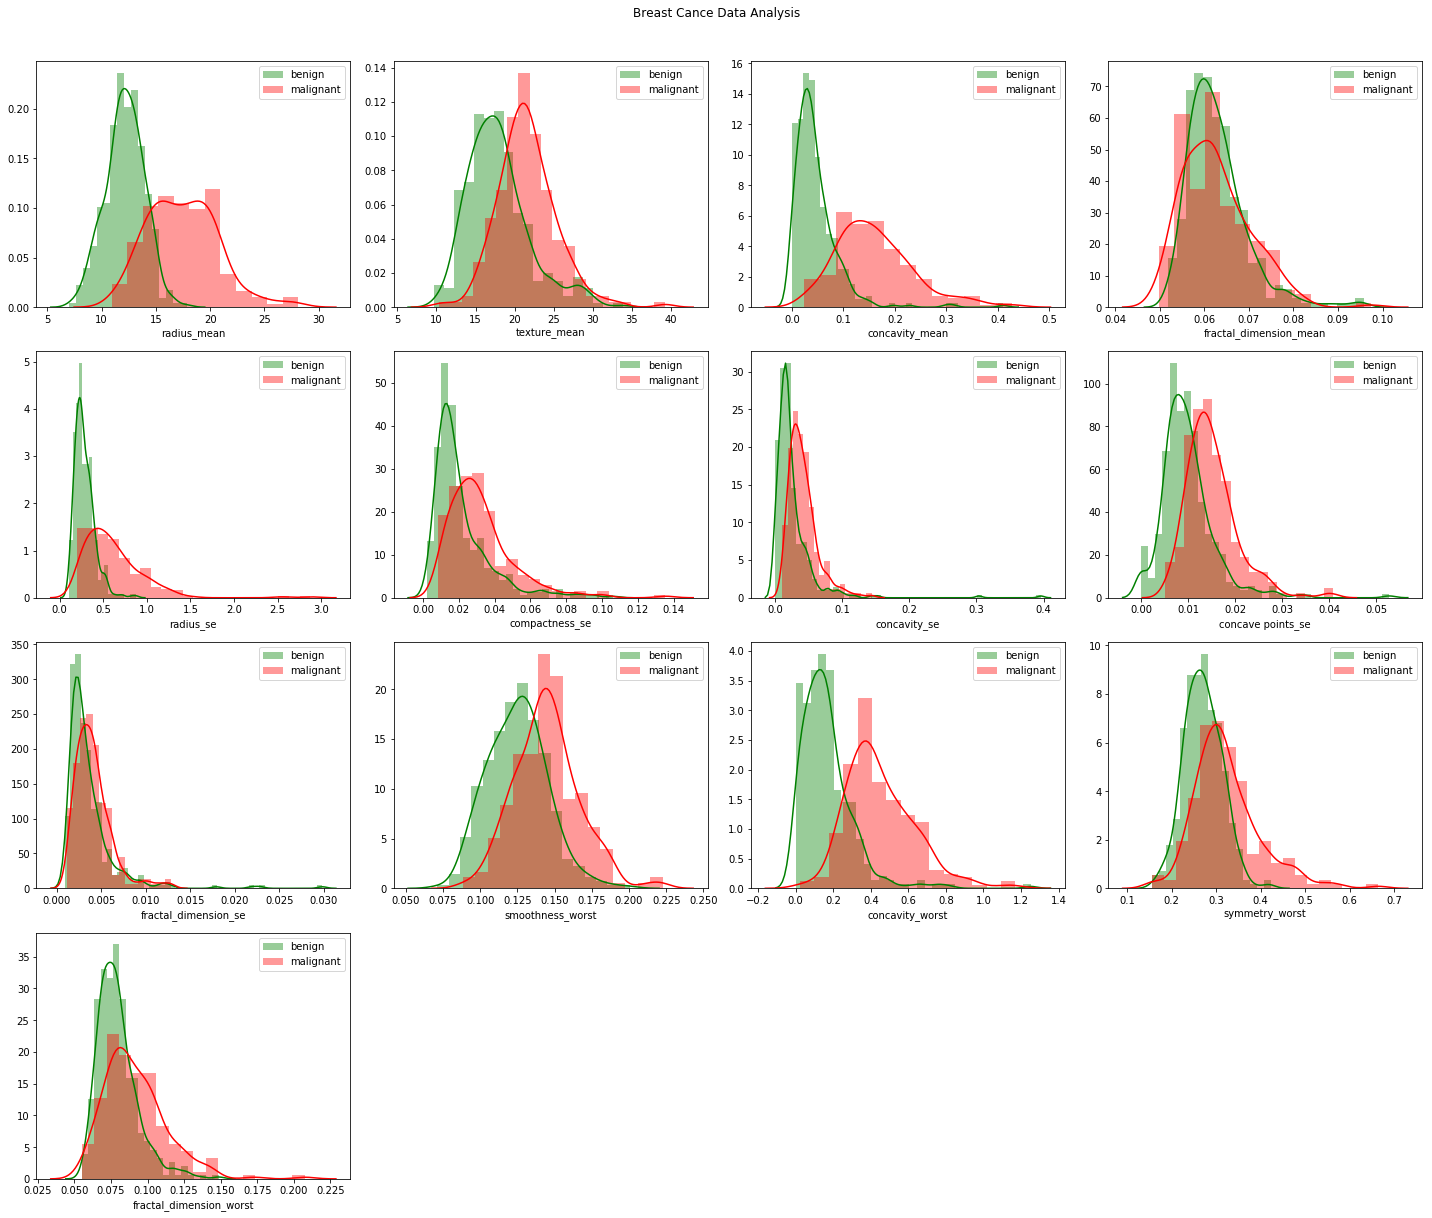

In [13]:
#Plotting the data to visualize their distribution
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [14]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [15]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
prediction = svc.predict(x_test)

In [17]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.9298245614035088
